In [1]:
# import pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Search for best hyperparameters using GridSearchCV and RandomForestRegressor

In [2]:
cars = pd.read_csv("final_cars.csv")

In [3]:
## create X and Y
y = cars['price']
X = cars.drop(columns=['price'])

In [4]:
X = pd.get_dummies(X)

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#### Set aside some data for testing

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [13]:
model = RandomForestRegressor()
params_grid  = [{'n_estimators' : [10,20,30] , 'max_features': [6,8,10,12]}]

In [14]:
grid_search = GridSearchCV(model, params_grid, cv = 5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [6, 8, 10, 12],
                          'n_estimators': [10, 20, 30]}])

In [15]:
## display scores 
results = grid_search.cv_results_
for score,param in zip(results['mean_test_score'], results['params']):
      print(score,param)

0.8135405011158177 {'max_features': 6, 'n_estimators': 10}
0.8428692718500141 {'max_features': 6, 'n_estimators': 20}
0.8232744170451392 {'max_features': 6, 'n_estimators': 30}
0.8331262128500718 {'max_features': 8, 'n_estimators': 10}
0.8156747211434329 {'max_features': 8, 'n_estimators': 20}
0.8364166007509845 {'max_features': 8, 'n_estimators': 30}
0.8509933073094166 {'max_features': 10, 'n_estimators': 10}
0.8043671266218307 {'max_features': 10, 'n_estimators': 20}
0.8355049100497395 {'max_features': 10, 'n_estimators': 30}
0.8199627146197466 {'max_features': 12, 'n_estimators': 10}
0.8111102425848772 {'max_features': 12, 'n_estimators': 20}
0.8276612558417913 {'max_features': 12, 'n_estimators': 30}


In [16]:
grid_search.best_params_

{'max_features': 10, 'n_estimators': 10}

In [17]:
grid_search.best_score_

0.8509933073094166

In [18]:
grid_search.best_estimator_

RandomForestRegressor(max_features=10, n_estimators=10)

### Build model with best estimator

In [19]:
model = grid_search.best_estimator_

In [20]:
y_pred = model.predict(X_test)

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred)

In [25]:
r2_score(y_test,y_pred)

0.9375228415387512

In [22]:
np.sqrt(mse)

2347.0945742140166

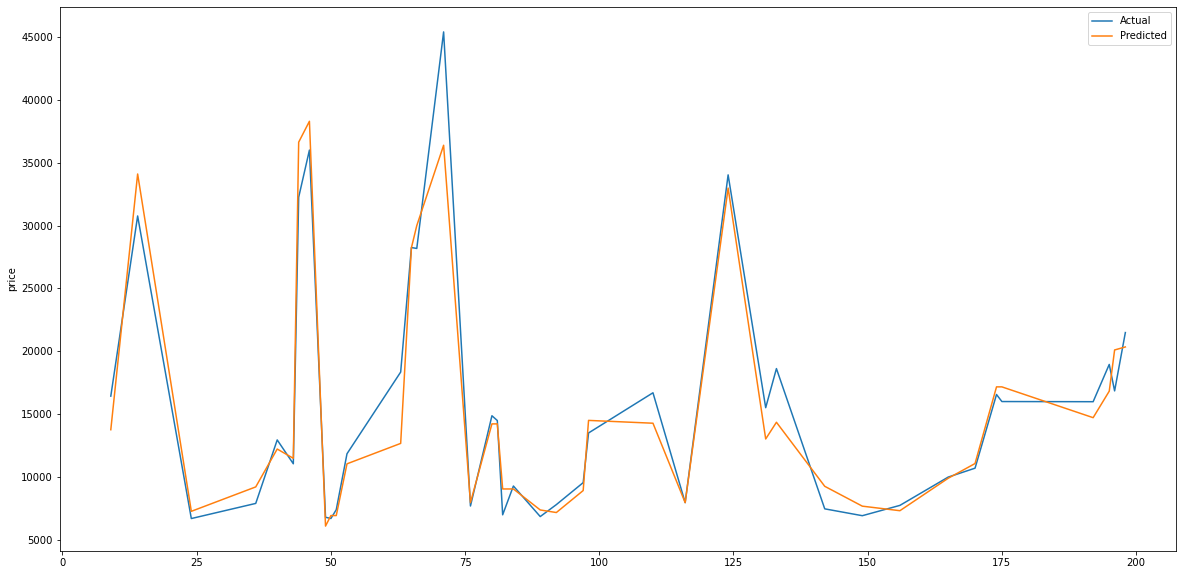

In [23]:
# Compare actual and predicted values
plt.gcf().set_size_inches(20,10)
sns.lineplot( y = y_test, x = X_test.index, label="Actual")
sns.lineplot( y = y_pred, x = X_test.index, label="Predicted")